<a href="https://colab.research.google.com/github/ErnestoFCh/Simulacion-I/blob/main/Estimacion_Pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analiticamente:
Definimos el estimador:
$$\hat{\pi}=\frac{4n}{N}$$
Consideramos la variable:
$$X_i=\left\{\begin{matrix}
1, &si \quad \text{el dardo cae dentro del punto}\quad (p) \\
 0,&si \quad \text{si cae fuera} \quad (1-p)
\end{matrix}\right.$$

Definimos:
$$Z_N=4\cdot\frac{X_1+X_2+...+X_N}{N}$$

Calculamos el valor esperado y la varianza que por sus propiedades se tiene:

$$E[Z_N]=\frac{4}{N}\cdot(E[X_1]+E[X_2]+...+E[X_N])$$
$$V[Z_N]=\frac{16}{N^2}\cdot(V[X_1]+V[X_2]+...+V[X_N])$$

En particular se tiene que para cada variable discreta $X_i$:

$$E[X_i]=1\cdot p + 0 \cdot (1-p)=p$$
$$\begin{align*}
V[X_i] &=E[X_{i}^2]-E[X_i]^2 \\
 &= (1^2\cdot p+0^2\cdot(1-p))-p^2\\
 &= p(1-p)
\end{align*}$$

$i.e$ $$E[Z_N]=\frac{4}{N}·Np=4p$$
$$V[Z_N]=\frac{16}{N^2}\cdot Np(1-p)=\frac{16p(1-p)}{N}$$

Ahora podemos usar la desigualdad de Chebyshev:

$$P(\left | Z_N-E[Z_N] \right | \geq \epsilon)\leq \frac{16p(1-p)}{\epsilon^2 N}$$

Ahora dado un valor  de $ϵ$ podemos calcular el valor de $N$.
Supongamos que no conocemos $p$, analizamos pues que $0<p<1:$

Ademas por el criterio de la segunda derivada notamos que:
$$P'=p(1-p)$$
tiene un maximo en $P'(\frac{1}{2})=\frac{1}{4}$.
Esto implica que $p(1-p)<\frac{1}{4}$

Nos preguntamos ahora ¿cuantos dardos hay que lanzar para que la probabilidad de cometer un error mayor o igual que $0.1$ (P) sea menor que $0.01$ (ϵ).


Para responder a esta pregunta debemos despejar N de la desigualdad de Chebyshev se tiene:
$$N=\frac{16p(1-p)}{\epsilon^2P(\left | Z_N-E[Z_N] \right | \geq \epsilon)}$$
$$N≈40000$$


#Por simulacion:

In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
N=1000

In [48]:
def estimacion(N):  #Generamos una muestra
    l=[]
    exitos=0
    for i in range(N):
        u1=np.random.uniform()
        u2=np.random.uniform()
        if u2<=(1-u1**2)**(1/2): #funcion de una cuarta parte de un circulo
            exitos=exitos+1
        prob=exitos/(i+1)     #Calculo de la probabilidad del evento
        l.append(4*prob)

    return l

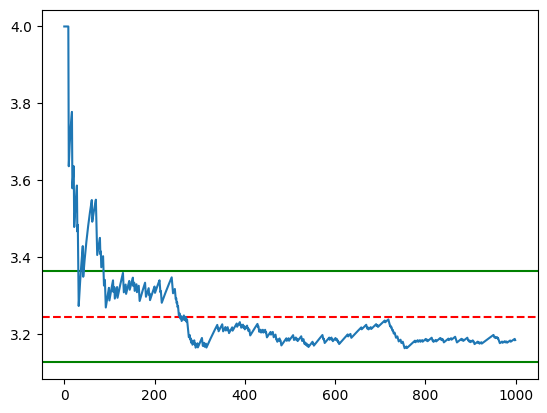

In [49]:
G=estimacion(N)

media=np.mean(G) #calculamos la media de las medias de la muestra
desv=np.std(G)   #Calculamos el error estandar de la media
#Graficamos un intervalo de confianza de un error estandar
plt.axhline(media,color='r',linestyle='--') #media
plt.axhline((desv+media),color='g') #limite superior del intervalo
plt.axhline((-desv+media),color='g') #limite inferior del intervalo
plt.plot(G)
plt.show()

¿Cual valor de $N$ elegir?
Se ve que una muestra $N\approx 500$ da un resutado aceptable.

Ademas para modificar la funcion y convertirla en una corrida de la simulacion: $l\rightarrow l[-1]$ y fijamos N=500. Por ejemplo:

In [50]:
N=500

In [51]:
def simulacion(M):
  r=[]
  for i in range(M):
    R=estimacion(N)
    r.append(R[-1])
  return r

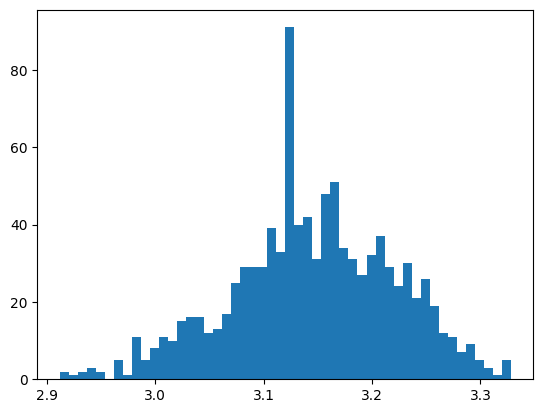

In [52]:
S=simulacion(1000)
plt.hist(S, bins=50)
plt.show()